# Row reduction and LU decomposition

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

## 1. Systems of Equation 
- Hệ phương trình là tập các phương trình có mối quan hệ với nhau 
- Cách tiếp cận giải hệ phương trình đó là nhân vô hướng hai vế của phương trình và trừ chúng đi lẫn nhau

### Converting equations into Matrices 
- Có thể chuyển đổi một hệ phương trình thành một matrix cho việc tìm nghiệm. Thay đổi với 2 bước : 
    1. chia đẳng thức thành constant ở bên phải và chứa biến ở bên trái $$ \begin{cases} x + y = 4 \\ - \frac{x}{2} + y = 2 \end{cases} $$ 
    2. Với vế trái, tách các hệ số (coeficients) thành một matrix với một row mỗi hệ số đó, vector biến được đặt theo chiều dọc và kết quả. Đẳng thức sẽ được chuyển thành phép toán có dạng : $$ Ax = b $$ 


### Working with Matrix Equations 
- Ta có thể sử dụng matrix equation tương tự như với các đẳng thức thông thường (phép norm, adding, multiplying, transposing, .... )
- Điều khác biết khi sử dụng các đẳng thức ma trận đó là phép nhân ma trận phụ thuộc vào chiều (side-dependent), phải nhân cùng một chiều với cả 2 bên đẳng thức 
$$ AX = B \\  CAX = CB $$ 

In [3]:
# ví dụ về giải bài toán chiều của matrix 
A = np.random.randn(4, 4)
B = np.random.randn(4, 4)

X1 = np.linalg.inv(A) @ B 
X2 = B @ np.linalg.inv(A)

In [4]:
res1 = A @ X1 - B 
res1 

array([[-8.88178420e-16,  2.22044605e-16,  5.55111512e-17,
        -5.55111512e-16],
       [ 2.52575738e-15,  1.11022302e-16, -8.88178420e-16,
         1.47104551e-15],
       [ 9.99200722e-16, -8.88178420e-16, -2.22044605e-16,
         9.99200722e-16],
       [-2.22044605e-15,  4.44089210e-16,  3.33066907e-16,
        -1.33226763e-15]])

In [5]:
res2 = A@X2 - B
res2

array([[-1.56557643e+01, -8.86386373e+00,  1.59496090e+00,
        -1.58541759e-01],
       [ 2.43884299e+01,  1.59134258e+01, -8.31611845e-01,
        -1.35963433e+00],
       [ 7.17167212e+00,  7.65819531e+00,  2.64043822e+00,
        -1.75534180e-02],
       [-1.75083874e+01, -1.36423899e+01,  1.58805108e+00,
        -2.89809976e+00]])

=> Có thể thấy, với hai các nhân khác nhau, matrix kết quả khác nhau

## 2. Row reduction 
- Row reduction là quá trình thực hiện hai phép toán : nhân vô hướng và cộng các hàng của matrix. 
- Mục tiêu chính của row reduction đó là chuyển đổi ma trận dày (dense matrix) thành một matrix tam giá trên (kết quả được gọi là echelon form).
- Ma trận sau khi được giảm chiều khác với ma trận trước khi giảm chiều,  nhưng hai ma trận được link với nhau bởi một ma trận tuy
- Người ta thường gọi ma trận link đó là $ L^{-1} $ hay trong LU decomposition có : $$ A = LU $$ với U là một matrix upper triangular và L là một transform matrix.
- Thông qua việc nhân vô hướng, có thể thấy có vô số U (echelon form)



In [6]:
def first_col_zeros(A: np.array) : 
    B = np.copy(A)

    for i in range(1, len(B)): 
        B[i] = B[i] - (B[i, 0]  /  B[0, 0]) * B[0]

    return B

reduced_matrix = first_col_zeros(A)
print(reduced_matrix)

[[-0.14098347 -0.53165403  0.34622067  0.79121891]
 [ 0.         -0.26379096  0.34960176  0.75571547]
 [ 0.          0.89980883 -0.40818754  1.42094792]
 [ 0.          2.55542789  0.25256801 -1.97530987]]


### Gaussian Elimination 
- Kĩ thuật khử Gaussian có thể giải được một phương trình matrix tuyến tính mà không cần tính inverse matrix.  
- Kĩ thuật này biến đổi matrix hệ số về dạng echelon form. Từ đó giải từng nghiệm của bài toán và thế ngược lại vào nghiệm trên
### Gauss-Jordan Elimination 
- Kĩ thuật khử Gauss-Jordan tương tự như kĩ thuật khử gauss tuy nhiên, tại  hàng thứ i, ta khử i - 1 hàng phía dưới nó để biến toàn bộ hệ số hàng i -1 đến n thành 0 và  thực hiện chia để chuẩn hóa hệ số thành 1 
- Dạng ma trận sau khi được khử như vậy được gọi là RREF của ma trận gốc 

In [7]:
import sympy as sym

M = np.array([[1, 1,4], [-1/2, 1, 2]])
symMat = sym.Matrix(M)

symMat.rref()

(Matrix([
 [1, 0, 1.33333333333333],
 [0, 1, 2.66666666666667]]),
 (0, 1))

### Matrix Inverse như Gauss-Jordan Elimination 
- Mục tiêu của phép khử Gauss-Jordan là giảm số lượng row để giải hệ phương trình và phép biến đổi đó được gọi là phép biến đổi tuyến tính (linear transformations)
=> Ta có thể thấy sự tương đồng giữa matrix inverse và Gauss-Jordan đó là đều dùng  biến đổi tuyến tính để giải hệ phương trình
- Người ta có thể sử dụng phép biến đổi tuyến tính Gauss-Jordan một vế để chuyển một ma trận A thành ma trận invert của nó. 
- Ví dụ, ta muốn tìm ma trận nghịch đảo của A đặt là x, ta sẽ giải phương trình $ Ax = I $, thông qua phép khử Gauss-Jordan, ta có thể thu được ma trận nghịch đảo mà không cần tính định thức từng phần 
$$ rref([A  | I]) => [I | A^{-1}] $$

# 3. LU Decomposition 
- Mục tiêu của việc phân tách LU đó là chia ma trận A thành tích của 2 ma trận lower-triangular và upper-triangular : $$ A =  LU $$ 


In [8]:
import scipy.linalg 

A = np.array([[3,  4, 9], [2, 2, 6], [6, 7, 8]])
P, L, U = scipy.linalg.lu(A)

print(f'L: {L}')
print(f'U: {U}')

L: [[ 1.          0.          0.        ]
 [ 0.5         1.          0.        ]
 [ 0.33333333 -0.66666667  1.        ]]
U: [[6.         7.         8.        ]
 [0.         0.5        5.        ]
 [0.         0.         6.66666667]]


- Có thể thấy, bởi vì echelon form không tồn tại duy nhất, LU decomposition không nhất thiết phải duy nhất (có vô số cặp UL nhân  vào thỏa mãn A).  Thêm điều kiện các đường chéo là bằng 1 để cặp ma trận tồn tại duy nhất 

## Doolittle Algorithm 
- Thuật toán Doolittle dùng thay thế cho việc sử dụng các phép khử Gauss trong việc biến đổi LU. Giả sử ta có ma trận vuông A (n x n) khi đó ta có : 
    1. Ma trận U được xác định theo công thức : $$ \forall j: \ i = 0 \rightarrow U_{ij} = A_{ij} \\ i > 0 \rightarrow U_{ij} = A_{ij} - \sum ^{i - 1}_{0} L_{ik}U_{ik} $$
    2. Ma trận L được xác định theo công thức : $$ \forall i: \ j= 0 \rightarrow L_{ij} = \frac {A_{ij}} {U_{ij}} \\ j > 0 : \ L_{ij } = \frac {A_{ij} - \sum ^{i - 1}_{0} L_{ik}U_{ik}} {U_{ij}} $$

## Row Swaps via Permutation Matrices 
- Một số ma trận không dễ dàng trong việc chuyển đổi sang upper hoặc lower triangular matrix, đôi khi ta cần chuyển đổi các dòng của ma trận để việc chuyển đối dễ dàng hơn. 
- Người ta sử dụng một ma trận cho việc đổi các dòng trong matrix gọi là ma trận  hoán vị (permutation matrices - P). Khi đó phép biến đổi LU có dạng : $$ PA = LU \\ A = P^{-1}LU \\ A = P^{T}LU $$ (Do P là một ma trận trực giao - chỉ chứa 0 và 1 - do đó ta có thể có phép biến đổi từ 2 sang 3 ) 


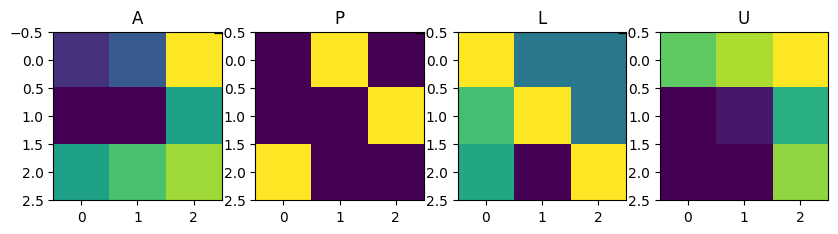

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (10, 6))

ax[0].imshow(A)
ax[0].set_title('A')

ax[1].imshow(P)
ax[1].set_title('P')

ax[2].imshow(L)
ax[2].set_title('L')

ax[3].imshow(U)
ax[3].set_title('U')

plt.show()

=> Có thể thấy, phép LU decomposition trong Scipy thực chất chứa thêm ma trận hoán vị P 